In [37]:
#imports needed to complete graphing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#read in planned data
df = pd.read_excel("C:/Users/Matt Kline/Documents/GitHub/DSC640/ex1-2/hotdog-contest-winners.xlsm")
df.head()

,Year,Winner,Dogs eaten,Country,New record
0,1980,Paul Siederman & Joe Baldini,9.1,United States,0
1,1981,Thomas DeBerry,11.0,United States,0
2,1982,Steven Abrams,11.0,United States,0
3,1983,Luis Llamas,19.5,Mexico,0
4,1984,Birgit Felden,9.5,Germany,0


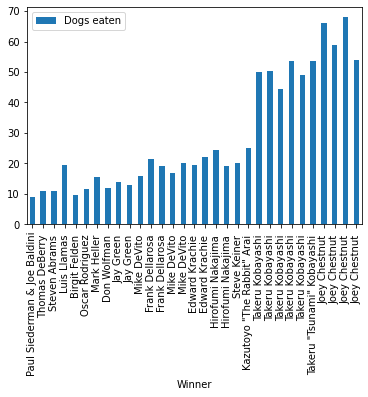

In [5]:
#bar plot
df.plot.bar(x="Winner", y = "Dogs eaten")

In [15]:
#stacked bar plot
#pivot table to create stacked bar
pivot_df = df.pivot(index='Winner', columns='Year', values='Dogs eaten')
pivot_df.head()

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Winner,,,,,,,,,,,,,,,,,,,,,
Birgit Felden,NaN,NaN,NaN,NaN,9.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Don Wolfman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Edward Krachie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frank Dellarosa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hirofumi Nakajima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#remove na
pivot_df = pivot_df.fillna(0)
pivot_df.head()

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Winner,,,,,,,,,,,,,,,,,,,,,
Birgit Felden,0.0,0.0,0.0,0.0,9.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Don Wolfman,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Edward Krachie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Frank Dellarosa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hirofumi Nakajima,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


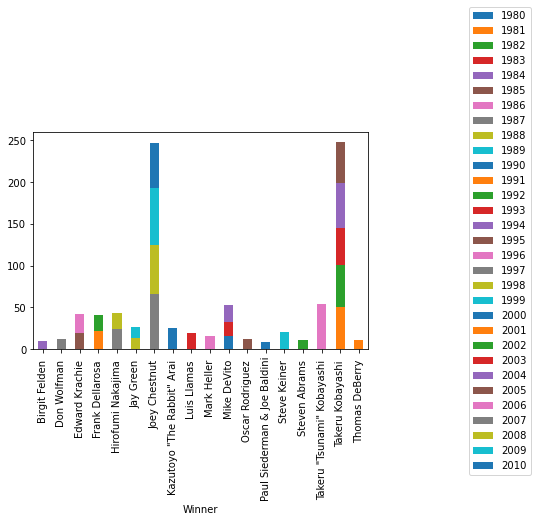

In [28]:
pivot_df.plot.bar(stacked=True).legend(loc='center right', bbox_to_anchor = (1.5,0.5))

In [29]:
#pie chart and setup
country = df['Country'].value_counts()
country


United States    20
Japan             9
Germany           1
Mexico            1
Name: Country, dtype: int64

In [32]:
country = pd.DataFrame(country)
country = country.reset_index()
country

,index,Country
0,United States,20
1,Japan,9
2,Germany,1
3,Mexico,1


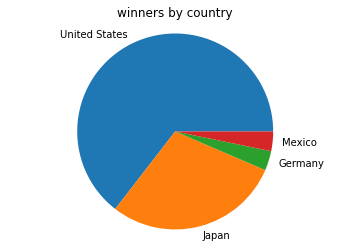

In [35]:
fig,ax = plt.subplots()
ax.pie(country['Country'],labels=country['index'])
ax.axis('equal')
plt.title("winners by country")
plt.show()

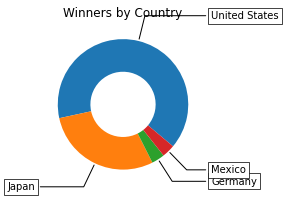

In [38]:
#donut graph
fig,ax = plt.subplots(figsize=(6,3), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(country['Country'], wedgeprops=dict(width=0.5),startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc='w', ec="k", lw=0.72)
kw= dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1:"left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(country["index"][i], xy=(x,y),xytext=(1.35*np.sign(x), 1.4*y), horizontalalignment=horizontalalignment, **kw)
    
ax.set_title("Winners by Country")
plt.show()